### TODO 进行GO富集分析


In [1]:
library(dplyr)
library(clusterProfiler)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.12.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.



In [2]:
All_Gene=read.table( 
    "At_All_GOitem.txt",
    header=F
)

At_gene=read.table(
    "./At_All_GOitem.txt",
    header=F
)
Dt_gene=read.table(
    "./Dt_All_GOitem.txt",
    header=F
)

All_Gene=rbind(
    At_gene,Dt_gene
)

colnames(All_Gene)=c("gene","GO")

bg_gene=read.table(
    "./Introgression/At_Dt_Is_all_gene.txt",
    header=F,sep="\t"
)
bg_gene_term=All_Gene %>% filter( 
    gene %in% bg_gene$V1
)
# bg_gene_term=All_Gene 


In [67]:
write.table(
    bg_gene_term ,"bg.gene.txt",
    row.names = F,col.names = F,sep="\t",quote = F
)

In [5]:
des <- go2term(
    bg_gene_term$GO
)
ont <- go2ont(
    bg_gene_term$GO
)

In [6]:
#* 使用两种Gene进行GO富集分析；
#! 在四倍体中存在变异，和在二倍体中存在变异
# queryGene_1 <- read.table(
#     "fractionation/A2_promoter_SV.txt",
#     header = F
# )
queryGene <- read.table(
    "Introgression/At_Dt_Is_gene.txt",
    header = F
)
# queryGene=rbind(
#     queryGene_1,queryGene_2
# )
length(unique(queryGene$V1))

[1] 1

In [195]:
queryGene<- read.table(
    "fractionation/At_promoter_SV.txt",
    header = F
)
length(unique(queryGene$V1))

[1] 2482

In [14]:
length(unique(bg_gene_term %>% pull(gene)))

[1] 37628

In [11]:
#* 进行GO富集分析
res <- enricher(
    gene = queryGene$V1,
    universe = bg_gene_term %>% pull(gene),
    qvalueCutof = 0.05,
    minGSSize=5,
    maxGSSize=500,
    pAdjustMethod = "fdr",
    TERM2GENE = bg_gene_term %>% select(c("GO", "gene")),
    TERM2NAME = des
)

--> No gene can be mapped....

--> Expected input gene ID: HC04_D05018230,HC04_A05044480,HC04_A10005660,HC04_D01000080,HC04_A01002850,HC04_D12001030

--> return NULL...



In [ ]:
#* 与term的类型进行组合
res@result %>%
    # filter(pvalue < 0.05) %>%
    left_join(
        ont,
        by = join_by(ID == go_id)
    ) %>%
    select(
        c(
            "ID", "Ontology", "Description",
            "GeneRatio", "BgRatio", "pvalue",
            "p.adjust", "qvalue", "geneID",
            "Count"
        )
    )

### TODO HYD区域的GO富集分析

In [1]:
library(dplyr)
library(clusterProfiler)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.12.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.



In [2]:
At_gene=read.table(
    "./At_All_GOitem.txt",
    header=F
)
colnames(At_gene)=c("gene","GO")
des <- go2term(
    At_gene$GO
)
ont <- go2ont(
    At_gene$GO
)

In [3]:
queryAt_gene <- read.table(
    "/public/home/zpliu/Pan-genome/peer_review/A2_At_PAV/At_HYD_region_containedGene.txt",
    header = T, sep = "\t"
)
res <- enricher(
    gene = queryAt_gene$geneId,
    universe = At_gene %>% pull(gene),
    qvalueCutof = 0.05,
    minGSSize=5,
    maxGSSize=500,
    pAdjustMethod = "fdr",
    TERM2GENE = At_gene %>% select(c("GO", "gene")),
    TERM2NAME = des
)

In [4]:
At_plotData=res@result %>%
    # filter(pvalue < 0.05) %>%
    left_join(
        ont,
        by = join_by(ID == go_id)
    ) %>%
    select(
        c(
            "ID", "Ontology", "Description",
            "GeneRatio", "BgRatio", "pvalue",
            "p.adjust", "qvalue", "geneID",
            "Count"
        )
    ) %>% filter(qvalue <= 0.05 & Ontology == "BP") %>%
    mutate(genome = "At") %>%
    select(
        "Description", "pvalue", "genome"
    )

In [5]:
At_plotData

Description,pvalue,genome
<chr>,<dbl>,<chr>
DNA integration,6.094983e-48,At
defense response,4.277693e-06,At
"photosynthesis, light reaction",6.675765e-06,At
biosynthetic process,8.173708e-04,At


#### TODO 对A2 HYD区域的Gene进行富集分析

In [6]:
A2_gene=read.table(
    "./A2_All_GOitem.txt",
    header=F
)
colnames(A2_gene)=c("gene","GO")
des <- go2term(
    A2_gene$GO
)
ont <- go2ont(
    A2_gene$GO
)

In [7]:
queryA2_gene <- read.table(
    "/public/home/zpliu/Pan-genome/peer_review/A2_At_PAV/A2_HYD_region_containedGene.txt",
    header = T, sep = "\t"
)
res <- enricher(
    gene = queryA2_gene$geneId,
    universe = A2_gene %>% pull(gene),
    qvalueCutof = 0.05,
    minGSSize=5,
    maxGSSize=500,
    pAdjustMethod = "fdr",
    TERM2GENE = A2_gene %>% select(c("GO", "gene")),
    TERM2NAME = des
)

In [8]:
A2_plotData=res@result %>%
    # filter(pvalue < 0.05) %>%
    left_join(
        ont,
        by = join_by(ID == go_id)
    ) %>%
    select(
        c(
            "ID", "Ontology", "Description",
            "GeneRatio", "BgRatio", "pvalue",
            "p.adjust", "qvalue", "geneID",
            "Count"
        )
    ) %>%
    filter(qvalue <= 0.05 & Ontology == "BP") %>%
    mutate(genome = "A2") %>%
    select(
        "Description", "pvalue", "genome"
    )

In [26]:
res@result %>%
    # filter(pvalue < 0.05) %>%
    left_join(
        ont,
        by = join_by(ID == go_id)
    ) %>%
    select(
        c(
            "ID", "Ontology", "Description",
            "GeneRatio", "BgRatio", "pvalue",
            "p.adjust", "qvalue", "geneID",
            "Count"
        )
    ) %>%
    filter(qvalue <= 0.05 & Ontology == "BP" & Description!="DNA integration")

ID,Ontology,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0009060,BP,aerobic respiration,6/963,6/17769,2.496714e-08,1.104796e-06,1.011826e-06,J85_Chr03023890/J85_Chr05025630/J85_Chr05025690/J85_Chr05025780/J85_Chr11010170/J85_Chr13022590,6
GO:0030488,BP,tRNA methylation,6/963,17/17769,1.841725e-04,2.963503e-03,2.714121e-03,J85_Chr03000010/J85_Chr03000020/J85_Chr03000040/J85_Chr03000050/J85_Chr03030990/J85_Chr11000160,6
GO:0017004,BP,cytochrome complex assembly,3/963,5/17769,1.461254e-03,1.989553e-02,1.822130e-02,J85_Chr05025860/J85_Chr05025900/J85_Chr13022730,3
GO:0006397,BP,mRNA processing,7/963,35/17769,2.378376e-03,2.734891e-02,2.504747e-02,J85_Chr02000010/J85_Chr03000020/J85_Chr07030010/J85_Chr11000010/J85_Chr11000170/J85_Chr11001770/J85_Chr13022820,7


In [9]:
plotData=rbind(
    At_plotData,
    A2_plotData
)

In [21]:
plotData=plotData %>% filter(
     !Description  %in% c("DNA integration")
)
plotData$Description=factor(plotData$Description,
    levels = c( 
        'defense response',
        'photosynthesis, light reaction',
        'biosynthetic process',
        'aerobic respiration',
        'tRNA methylation',
        'cytochrome complex assembly',
        'mRNA processing'
    )
)

png 
  2

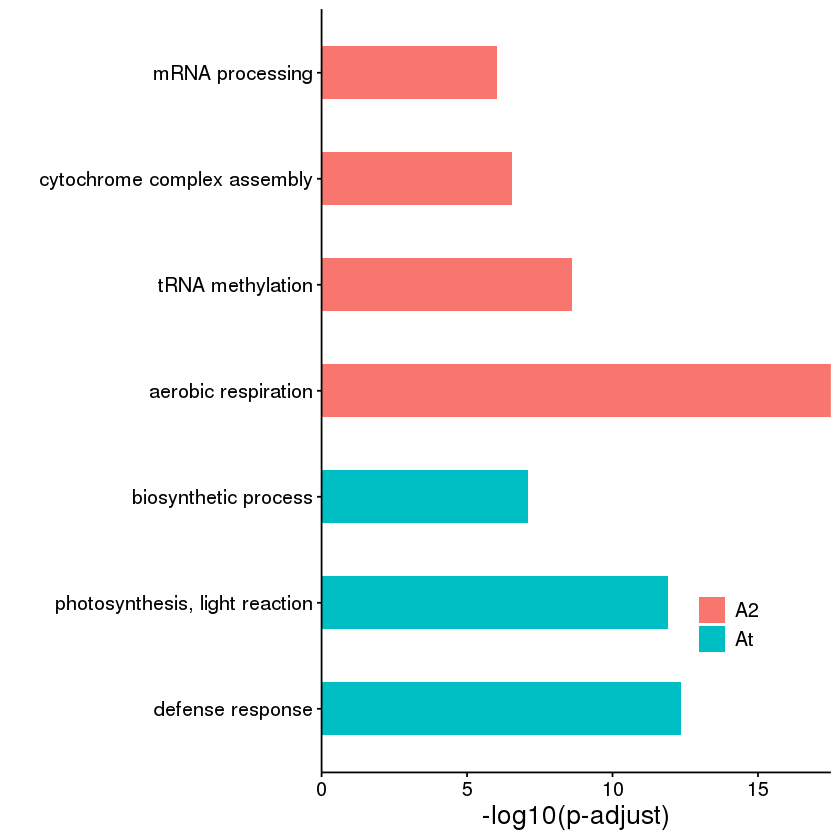

In [24]:
p <- plotData %>% ggplot(
    aes(y = Description, x = -log(pvalue), fill = genome)
) +
    geom_bar(
        stat = "identity",
        position = position_dodge(),
        width = 0.5
    ) +
    theme_classic() +
    theme(
        legend.position = c(0.8, 0.2),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        legend.title = element_blank(),
        legend.text = element_text(size = 12)
    ) +
    base_theme +
    scale_x_continuous(expand = c(0, 0)) +
    xlab("-log10(p-adjust)") +
    ylab("")
pdf("/public/home/zpliu/Pan-genome/peer_review/A2_At_PAV/GO_info.pdf", width = 10, height = 7)
print(p)
dev.off()
p